In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
#Question 1

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3: Assign it to a variable called users
users = pd.read_csv(url, sep="|")

# Step 4: Discover what is the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("\nStep 4: Mean Age per Occupation:\n", '-'*30)
print(mean_age_per_occupation)

# Step 5: Discover the Male ratio per occupation and sort it from the most to the least
male_users = users[users['gender'] == 'M']
male_ratio = male_users.groupby('occupation').size() / users.groupby('occupation').size()
sorted_male_ratio = male_ratio.sort_values(ascending=False)
print("\nStep 5: Male Ratio per Occupation (sorted):\n", '-'*40)
print(sorted_male_ratio)

# Step 6: For each occupation, calculate the minimum and maximum ages
min_age_per_occupation = users.groupby('occupation')['age'].min()
max_age_per_occupation = users.groupby('occupation')['age'].max()
print("\nStep 6: Minimum and Maximum Ages per Occupation:\n", '-'*50)
print("Minimum Age:\n", min_age_per_occupation)
print("\nMaximum Age:\n", max_age_per_occupation)

# Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nStep 7: Mean Age by Occupation and Gender:\n", '-'*40)
print(mean_age_by_occupation_gender)

# Step 8: For each occupation present the percentage of women and men
gender_counts = users.groupby(['occupation', 'gender']).size().unstack()
gender_percentage = gender_counts.divide(gender_counts.sum(axis=1), axis=0) * 100
print("\nStep 8: Gender Percentage per Occupation:\n", '-'*35)
print(gender_percentage)



Step 4: Mean Age per Occupation:
 ------------------------------
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5: Male Ratio per Occupation (sorted):
 ----------------------------------------
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.83333

In [3]:
# Question 2

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3: Assign it to a variable called euro12
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
print("\nStep 4: Goals by each team:\n", '-'*30)
print(euro12['Goals'])

# Step 5: How many teams participated in the Euro2012?
print("\nStep 5: Number of teams participated:", euro12['Team'].nunique())

# Step 6: What is the number of columns in the dataset?
print("\nStep 6: Number of columns:", euro12.shape[1])

# Step 7: View only the columns Team, Yellow Cards and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nStep 7: Discipline Data:\n", '-'*30)
print(discipline)

# Step 8: Sort the teams by Red Cards, then to Yellow Cards
sorted_teams = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
print("\nStep 8: Teams sorted by Red and Yellow Cards:\n", '-'*50)
print(sorted_teams)

# Step 9: Calculate the mean Yellow Cards given per Team
print("\nStep 9: Mean Yellow Cards:", discipline['Yellow Cards'].mean())

# Step 10: Filter teams that scored more than 6 goals
high_scorers = euro12[euro12['Goals'] > 6]
print("\nStep 10: Teams with more than 6 goals:\n", '-'*40)
print(high_scorers['Team'])

# Step 11: Select the teams that start with G
g_teams = euro12[euro12['Team'].str.startswith('G')]
print("\nStep 11: Teams that start with 'G':\n", '-'*30)
print(g_teams['Team'])

# Step 12: Select the first 7 columns
first_seven_columns = euro12.iloc[:, :7]
print("\nStep 12: First 7 columns of the data:\n", '-'*35)
print(first_seven_columns)

# Step 13: Select all columns except the last 3
excluding_last_three = euro12.iloc[:, :-3]
print("\nStep 13: Data excluding last 3 columns:\n", '-'*40)
print(excluding_last_three)

# Step 14: Present only the Shooting Accuracy from England, Italy and Russia
selected_countries = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("\nStep 14: Shooting Accuracy of England, Italy and Russia:\n", '-'*60)
print(selected_countries)



Step 4: Goals by each team:
 ------------------------------
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5: Number of teams participated: 16

Step 6: Number of columns: 35

Step 7: Discipline Data:
 ------------------------------
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
1

In [4]:
#Question 3

# Step 2: Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10_000, 30_001, 100))

# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)

# Step 4: Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Print the dataframe
print("\nStep 4: DataFrame with new column names:\n", '-'*40)
print(df)

# Step 5: Create 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0)
bigcolumn_df = bigcolumn.to_frame(name='bigcolumn')

# Print the bigcolumn dataframe
print("\nStep 5: 'bigcolumn' DataFrame:\n", '-'*30)
print(bigcolumn_df)

# Step 6: Checking index
print("\nStep 6: Maximum index of 'bigcolumn':", bigcolumn_df.index.max())

# Step 7: Reindexing
bigcolumn_df = bigcolumn_df.reset_index(drop=True)

# Print reindexed bigcolumn dataframe
print("\nStep 7: 'bigcolumn' DataFrame after reindexing:\n", '-'*45)
print(bigcolumn_df)



Step 4: DataFrame with new column names:
 ----------------------------------------
    bedrs  bathrs  price_sqr_meter
0       2       3            18761
1       4       1            27581
2       2       1            27044
3       1       1            22284
4       3       3            13468
..    ...     ...              ...
95      3       3            22863
96      3       2            23373
97      1       2            28821
98      2       1            10102
99      1       1            25680

[100 rows x 3 columns]

Step 5: 'bigcolumn' DataFrame:
 ------------------------------
    bigcolumn
0           2
1           4
2           2
3           1
4           3
..        ...
95      22863
96      23373
97      28821
98      10102
99      25680

[300 rows x 1 columns]

Step 6: Maximum index of 'bigcolumn': 99

Step 7: 'bigcolumn' DataFrame after reindexing:
 ---------------------------------------------
     bigcolumn
0            2
1            4
2            2
3            1
4  

In [5]:
#Question 4

# Step 2: Import the dataset from the specified location
path = r'C:\Georgian\Geogrian exept Architecture VM\Programming\DS 3\wind.txt'
data = pd.read_csv(path, sep="\s+", parse_dates=[[0,1,2]])

# Steps 3-15 remain the same:

# Step 3: Replace the first 3 columns by a proper datetime index.
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'])
data = data.set_index('Yr_Mo_Dy')

# Step 4: Fixing the year
def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year, x.month, x.day)

data.index = data.index.map(fix_century)

# Step 5: Set the right dates as the index
data.index = pd.to_datetime(data.index)

# Step 6: Compute how many values are missing
missing_data = data.isnull().sum()

# Step 7: Compute how many non-missing values there are
non_missing = data.notnull().sum().sum()

# Step 8: Calculate the mean windspeeds
mean_windspeed = data.mean().mean()

# Step 9: loc_stats DataFrame
loc_stats = data.describe(percentiles=[]).T[['mean', 'min', 'max', 'std']]

# Step 10: day_stats DataFrame
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

# Step 11: Average windspeed in January
january_winds = data[data.index.month == 1].mean()

# Step 12: Downsample to a yearly frequency
yearly = data.resample('A').mean()

# Step 13: Downsample to a monthly frequency
monthly = data.resample('M').mean()

# Step 14: Downsample to a weekly frequency
weekly = data.resample('W').mean()

# Step 15: Calculate min, max, mean and std for each week for the first 52 weeks
weekly_stats = weekly.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[1:53]

print(weekly_stats)


                  RPT                                  VAL             \
                  min        max       mean std        min        max   
Yr_Mo_Dy                                                                
1961-01-08  13.541429  13.541429  13.541429 NaN  11.486667  11.486667   
1961-01-15  12.468571  12.468571  12.468571 NaN   8.967143   8.967143   
1961-01-22  13.204286  13.204286  13.204286 NaN   9.862857   9.862857   
1961-01-29  19.880000  19.880000  19.880000 NaN  16.141429  16.141429   
1961-02-05  16.827143  16.827143  16.827143 NaN  15.460000  15.460000   
1961-02-12  19.684286  19.684286  19.684286 NaN  16.417143  16.417143   
1961-02-19  15.130000  15.130000  15.130000 NaN  15.091429  15.091429   
1961-02-26  15.221429  15.221429  15.221429 NaN  13.625714  13.625714   
1961-03-05  12.101429  12.101429  12.101429 NaN  12.951429  12.951429   
1961-03-12   9.376667   9.376667   9.376667 NaN  11.578571  11.578571   
1961-03-19  11.911429  11.911429  11.911429 NaN  13

In [6]:
#Question 5

# Step 2: Importing the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep="\t")

# Step 4: Displaying the first 10 entries
print(chipo.head(10))

# Step 5: Number of observations
print("\nNumber of observations:", chipo.shape[0])

# Step 6: Number of columns
print("\nNumber of columns:", chipo.shape[1])

# Step 7: Names of all columns
print("\nColumn Names:", chipo.columns.tolist())

# Step 8: Indexing of dataset
print("\nIndex:", chipo.index)

# Step 9 & 10: Most ordered item and its quantity
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)
print("\nMost ordered item:", most_ordered_item.index[0])
print("Number of", most_ordered_item.index[0], "ordered:", most_ordered_item.iloc[0])

# Step 11: Most ordered item in the choice_description column
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).head(1)
print("\nMost ordered choice:", most_ordered_choice.index[0])

# Step 12: Total items ordered
print("\nTotal items ordered:", chipo['quantity'].sum())

# Step 13: Turning item price into a float and checking the type
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("\nItem price type after conversion:", chipo['item_price'].dtype)

# Step 14: Revenue for the period
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nRevenue:", revenue)

# Step 15: Number of orders made in the period
orders = chipo['order_id'].nunique()
print("\nNumber of orders:", orders)

# Step 16: Average revenue amount per order
print("\nAverage revenue amount per order:", revenue / orders)

# Step 17: Number of different items sold
unique_items = chipo['item_name'].nunique()
print("\nNumber of different items sold:", unique_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

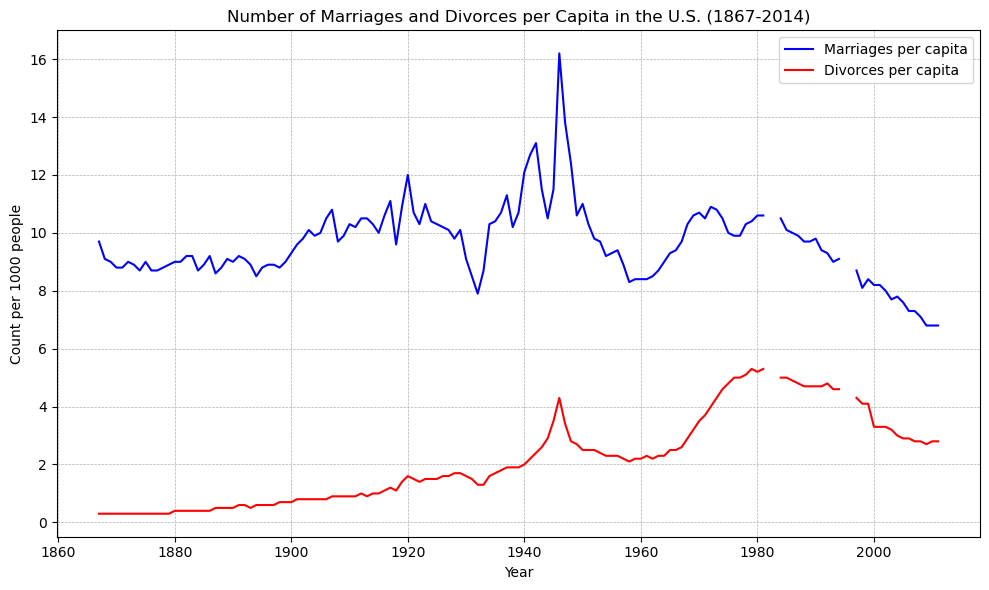

In [7]:
#Question 6

# 1. Importing the necessary libraries

# 2. Loading the dataset
data_path = "C:\\Georgian\\Geogrian exept Architecture VM\\Programming\\DS 3\\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)

# 3. Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per capita', color='blue')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per capita', color='red')

# 4. Labeling the plot
plt.title("Number of Marriages and Divorces per Capita in the U.S. (1867-2014)")
plt.xlabel("Year")
plt.ylabel("Count per 1000 people")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


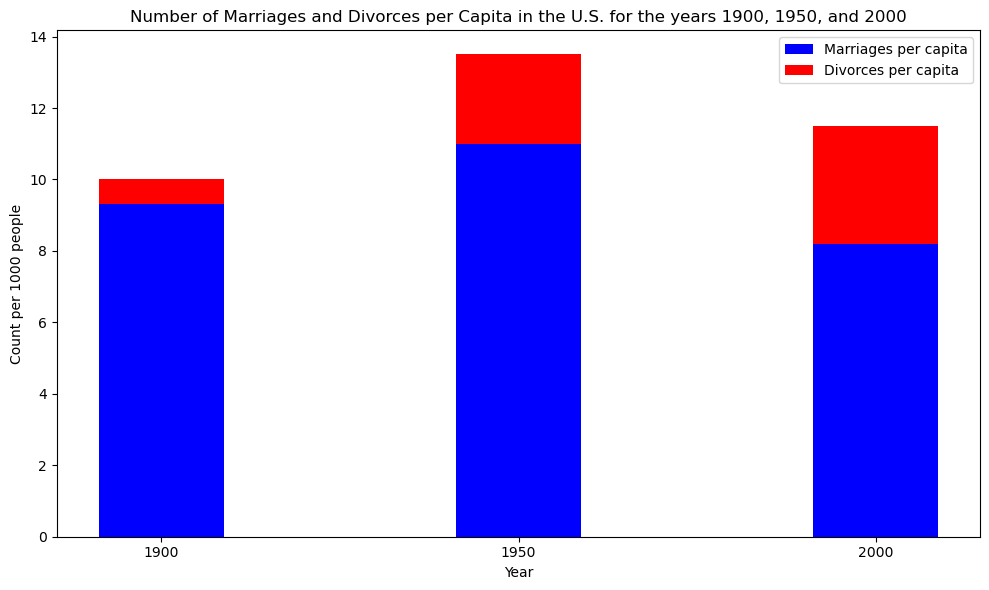

In [8]:
#Question 7

# 1. Loading the dataset and filtering
data_path = "C:\\Georgian\\Geogrian exept Architecture VM\\Programming\\DS 3\\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(data_path)
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]

# 2. Creating the vertical bar chart
bar_width = 0.35
index = filtered_data['Year'].astype(str)  # Convert years to string to use as labels
marriages = filtered_data['Marriages_per_1000']
divorces = filtered_data['Divorces_per_1000']

plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, marriages, bar_width, label='Marriages per capita', color='blue')
bar2 = plt.bar(index, divorces, bar_width, label='Divorces per capita', color='red', bottom=marriages)

# 3. Labeling the plot
plt.title("Number of Marriages and Divorces per Capita in the U.S. for the years 1900, 1950, and 2000")
plt.xlabel("Year")
plt.ylabel("Count per 1000 people")
plt.legend()
plt.tight_layout()
plt.show()


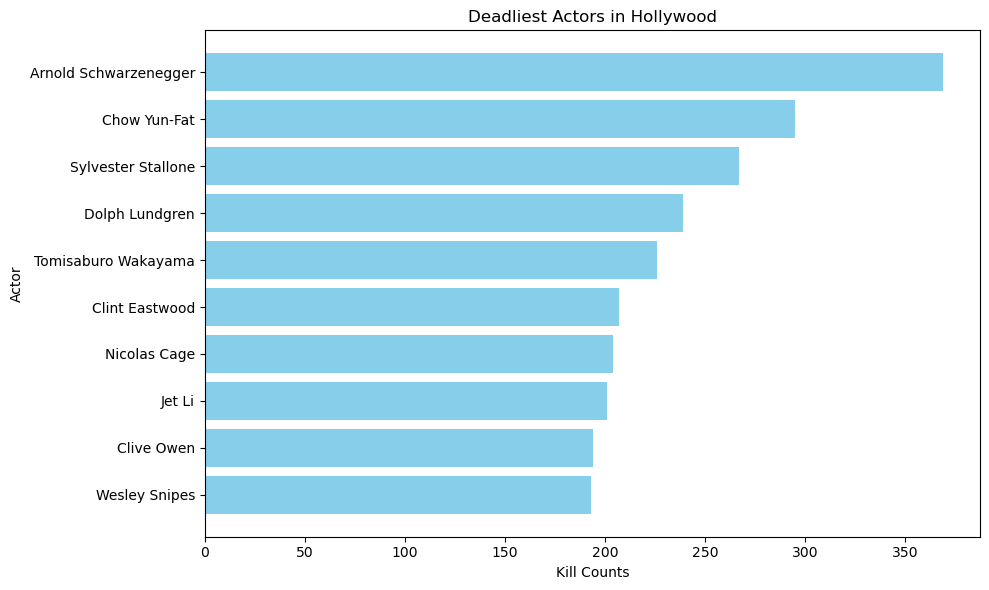

In [9]:
#Question 8

# 1. Loading the data
data_path = r'C:\Georgian\Geogrian exept Architecture VM\Programming\DS 3\actor_kill_counts.csv'
data = pd.read_csv(data_path)

# 2. Sorting the data by kill count
sorted_data = data.sort_values(by='Count', ascending=True)

# 3. Creating the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')
plt.xlabel('Kill Counts')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.tight_layout()
plt.show()


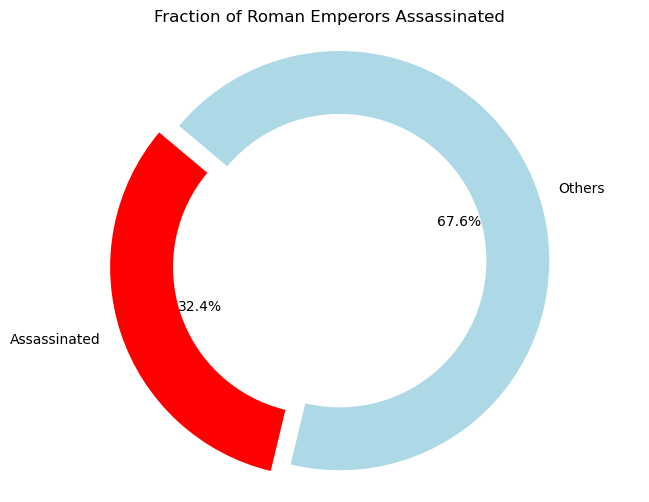

In [10]:
#Question 9

# 1. Load the dataset
data_path = r'C:\Georgian\Geogrian exept Architecture VM\Programming\DS 3\roman-emperor-reigns.csv'
data = pd.read_csv(data_path)

# 2. Count the number of emperors that were assassinated and those that weren't
cause_counts = data['Cause_of_Death'].value_counts()

# 3. For our pie chart, we are interested in those that were assassinated vs. others
assassinated = cause_counts.get('Assassinated', 0)
others = cause_counts.sum() - assassinated

# 4. Generate the pie chart
labels = ['Assassinated', 'Others']
sizes = [assassinated, others]
colors = ['red', 'lightblue']
explode = (0.1, 0)  # explode 1st slice to highlight assassinated emperors

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title("Fraction of Roman Emperors Assassinated")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Displaying the pie chart
plt.show()



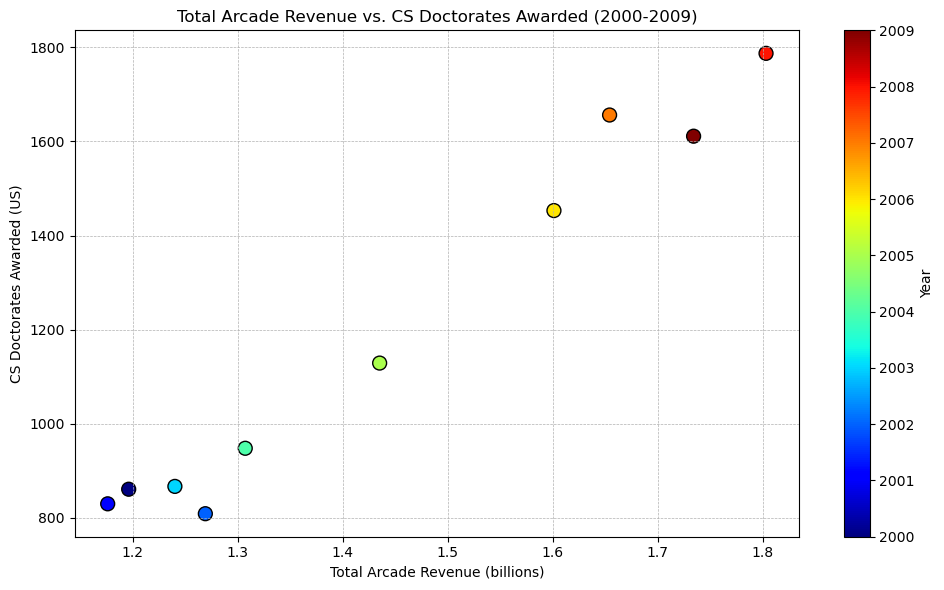

In [11]:
#Question 10

# 1. Load the dataset
data_path = r'C:\Georgian\Geogrian exept Architecture VM\Programming\DS 3\arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(data_path)

# 2. Generate the scatter plot
plt.figure(figsize=(10, 6))

# Use the year for coloring
colors = data['Year']

plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
            s=100, c=colors, edgecolor='black', cmap='jet')

# Setting the title and labels
plt.title('Total Arcade Revenue vs. CS Doctorates Awarded (2000-2009)')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('CS Doctorates Awarded (US)')

# Displaying a colorbar to denote the year
cbar = plt.colorbar()
cbar.set_label('Year')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Displaying the scatter plot
plt.show()
